# Libraries 

In [3]:
import pandas as pd
pd.set_option('display.max_columns',None)
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
"""
sns.set(rc={'figure.figsize':(18,8)},style='darkgrid')
sns.set_palette('rocket')
from time import time
#import pingouin
from scipy.stats import ttest_ind
#from datasist.structdata import detect_outliers
from geopy.distance import great_circle
from category_encoders import WOEEncoder
from sklearn.metrics import *
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')
"""

"\nsns.set(rc={'figure.figsize':(18,8)},style='darkgrid')\nsns.set_palette('rocket')\nfrom time import time\n#import pingouin\nfrom scipy.stats import ttest_ind\n#from datasist.structdata import detect_outliers\nfrom geopy.distance import great_circle\nfrom category_encoders import WOEEncoder\nfrom sklearn.metrics import *\nfrom sklearn.preprocessing import StandardScaler\nfrom sklearn.ensemble import RandomForestClassifier\nfrom sklearn.tree import DecisionTreeClassifier\nfrom sklearn.linear_model import LogisticRegression\nfrom xgboost import XGBClassifier\nfrom sklearn.ensemble import GradientBoostingClassifier\nfrom sklearn.ensemble import AdaBoostClassifier\nfrom sklearn.neighbors import KNeighborsClassifier\nimport warnings\nwarnings.filterwarnings('ignore')\n"

In [12]:
#df = pd.read_csv("final_data.csv")

In [7]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [6]:
df.duplicated().sum()

0

In [8]:
df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [10]:
df.shape

(1296675, 23)

- converting date time data into date datatype

In [3]:
from datetime import datetime

#convert series object to datetime object
df.trans_date_trans_time = pd.to_datetime(df.trans_date_trans_time)

#extra datetime elements
df['month'] = df.trans_date_trans_time.dt.month
df['day'] = df.trans_date_trans_time.dt.day_name()
df['hour'] = df.trans_date_trans_time.dt.hour

- Creating age column from date of birth column

In [4]:
df.dob = pd.to_datetime(df.dob)
df['age'] = (df.trans_date_trans_time - df.dob).dt.days // 365
df['birth_month'] = df.dob.dt.month

- splitting data for analysis

In [5]:
df_train = df.sample(frac=0.5, random_state=1)
df_test = df.drop(df_train.index)

In [6]:
df

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,month,day,hour,age,birth_month
0,2019-08-11 19:38:33,4681601008538160,fraud_Hermann and Sons,shopping_pos,50.81,Tammy,Davis,F,77663 Colleen Freeway,Moundsville,WV,26041,39.9148,-80.7310,16183,Physiotherapist,1977-08-12,f64003a5726ca99519ef2ad18bce32f5,1344713913,39.238053,-81.728984,0,8,Sunday,19,42,8
1,2020-02-21 13:31:42,4653879239169997,"fraud_Cronin, Kshlerin and Weber",health_fitness,1.97,Monica,Tucker,F,302 Christina Islands,Smiths Grove,KY,42171,37.0581,-86.1938,6841,"Therapist, sports",1999-06-06,f8e25094098b22a8e9dce2670ffe891e,1361453502,36.665575,-85.608885,0,2,Friday,13,20,6
2,2019-09-03 02:39:49,4334230547694630,fraud_Rutherford-Mertz,grocery_pos,100.18,Scott,Martin,M,7483 Navarro Flats,Freedom,WY,83120,43.0172,-111.0292,471,"Education officer, museum",1967-08-02,291160a410748e5bec42d95ae06132ae,1346639989,43.362578,-110.580382,0,9,Tuesday,2,52,8
3,2020-03-31 02:39:04,2256234701263057,fraud_Kris-Padberg,shopping_pos,7.67,Christopher,Grimes,M,39631 Dunn Radial,Grantham,NH,3753,43.5103,-72.1334,2971,Charity fundraiser,1948-04-11,df716fe9ce97522bc074d8c93e6e18c2,1364697544,44.312773,-71.555079,0,3,Tuesday,2,72,4
4,2020-12-05 07:58:57,6011948324228984,"fraud_Towne, Greenholt and Koepp",shopping_net,478.10,Mckenzie,Brooks,F,3872 Matthew Skyway,Paris,MS,38949,34.1992,-89.3820,297,"Administrator, local government",1961-12-14,c33bcd8c63d50b4fe9c2514c7107e1ba,1386230337,34.362314,-89.623306,0,12,Saturday,7,59,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19297,2020-12-22 22:05:48,2242176657877538,"fraud_Willms, Kris and Bergnaum",shopping_pos,1041.51,Travis,Daniel,M,1327 Rose Causeway Apt. 610,Senatobia,MS,38668,34.6323,-89.8855,14462,Database administrator,1959-03-03,35b0297dd026d2e9a75d024a5dec7955,1387749948,34.573471,-89.911011,1,12,Tuesday,22,61,3
19298,2020-12-22 22:18:07,2242176657877538,fraud_Kuhn LLC,shopping_pos,868.09,Travis,Daniel,M,1327 Rose Causeway Apt. 610,Senatobia,MS,38668,34.6323,-89.8855,14462,Database administrator,1959-03-03,da7f67d7375f10a054a3d919448c45dd,1387750687,34.091227,-90.390612,1,12,Tuesday,22,61,3
19299,2020-12-22 22:31:48,2242176657877538,"fraud_Mosciski, Ziemann and Farrell",shopping_net,1039.42,Travis,Daniel,M,1327 Rose Causeway Apt. 610,Senatobia,MS,38668,34.6323,-89.8855,14462,Database administrator,1959-03-03,25b076c7bcd70f272c1c5326bb234f4b,1387751508,34.628434,-90.284780,1,12,Tuesday,22,61,3
19300,2020-12-22 23:06:03,2242176657877538,fraud_Bauch-Raynor,grocery_pos,289.27,Travis,Daniel,M,1327 Rose Causeway Apt. 610,Senatobia,MS,38668,34.6323,-89.8855,14462,Database administrator,1959-03-03,2df7d894868fbc99ec1d8b055585fc9d,1387753563,34.746063,-90.401093,1,12,Tuesday,23,61,3


# EDA

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19302 entries, 0 to 19301
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   trans_date_trans_time  19302 non-null  datetime64[ns]
 1   cc_num                 19302 non-null  int64         
 2   merchant               19302 non-null  object        
 3   category               19302 non-null  object        
 4   amt                    19302 non-null  float64       
 5   first                  19302 non-null  object        
 6   last                   19302 non-null  object        
 7   gender                 19302 non-null  object        
 8   street                 19302 non-null  object        
 9   city                   19302 non-null  object        
 10  state                  19302 non-null  object        
 11  zip                    19302 non-null  int64         
 12  lat                    19302 non-null  float64       
 13  l

In [8]:
df.isnull().sum()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
month                    0
day                      0
hour                     0
age                      0
birth_month              0
dtype: int64

- No missing value found in dataset

In [9]:
df.duplicated().sum()

0

- There are no duplicated rows, so each row is a unique transaction

In [10]:
df.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud', 'month', 'day', 'hour', 'age', 'birth_month'],
      dtype='object')

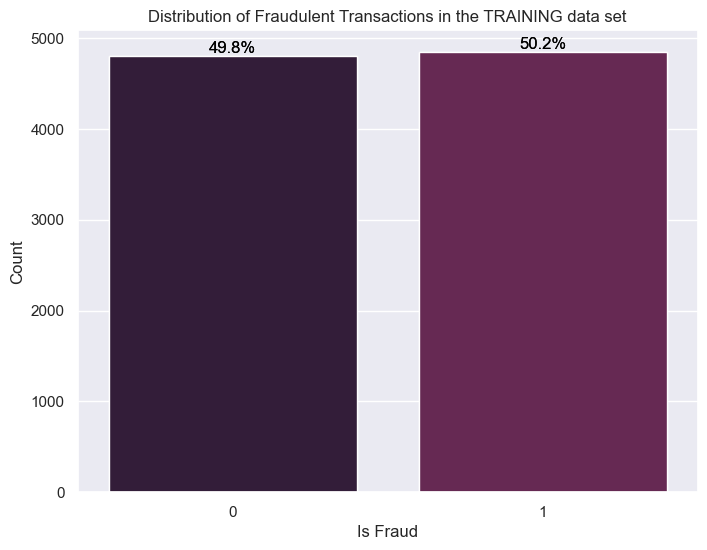

In [11]:
#check distribution of outcome variable, 'is_fraud'
plt.figure(figsize=(8, 6))
sns.countplot(x='is_fraud', data=df_train)
ax = sns.countplot(x='is_fraud', data=df_train)
plt.title('Distribution of Fraudulent Transactions in the TRAINING data set')
plt.xlabel('Is Fraud')
plt.ylabel('Count')
total = len(df_train['is_fraud'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.text(x, y, percentage, ha='center', va='bottom', fontsize=12, color='black')

plt.show()

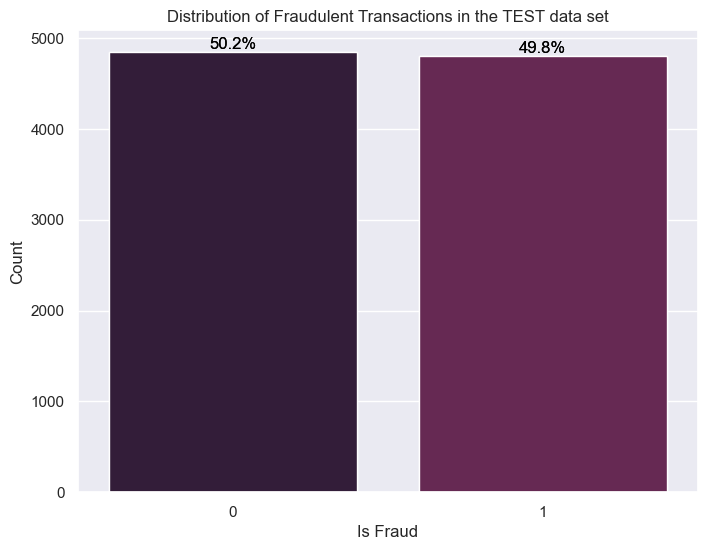

In [12]:
#check distribution of outcome variable, 'is_fraud'
plt.figure(figsize=(8, 6))
sns.countplot(x='is_fraud', data=df_test)
ax = sns.countplot(x='is_fraud', data=df_test)
plt.title('Distribution of Fraudulent Transactions in the TEST data set')
plt.xlabel('Is Fraud')
plt.ylabel('Count')
total = len(df_test['is_fraud'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.text(x, y, percentage, ha='center', va='bottom', fontsize=12, color='black')

plt.show()

In [13]:
sum(df_train['is_fraud'] == 1)/df_train.shape[0]

0.5022277484198528

In [14]:
not_fraud = df_train[df_train['is_fraud'] == 0]
fraud = df_train[df_train['is_fraud'] == 1]

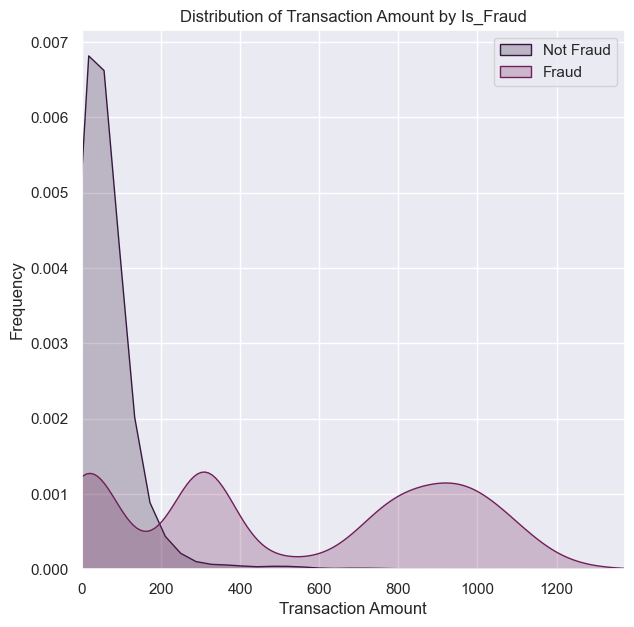

In [15]:
plt.figure(figsize=(7,7))
sns.kdeplot(not_fraud.amt, fill=True, label='Not Fraud')
sns.kdeplot(fraud.amt, fill=True, label='Fraud')
plt.ylabel('Frequency')
plt.xlabel('Transaction Amount')
plt.xlim(0, fraud.amt.max())
plt.title('Distribution of Transaction Amount by Is_Fraud')
plt.legend()

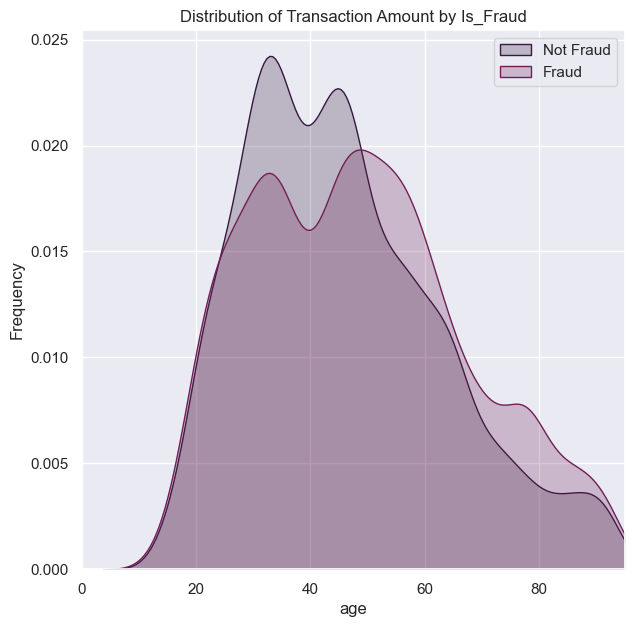

In [16]:
plt.figure(figsize=(7,7))
sns.kdeplot(not_fraud.age, fill=True, label='Not Fraud')
sns.kdeplot(fraud.age, fill=True, label='Fraud')
plt.ylabel('Frequency')
plt.xlabel('age')
plt.xlim(0, fraud.age.max())
plt.title('Distribution of Transaction Amount by Is_Fraud')
plt.legend()

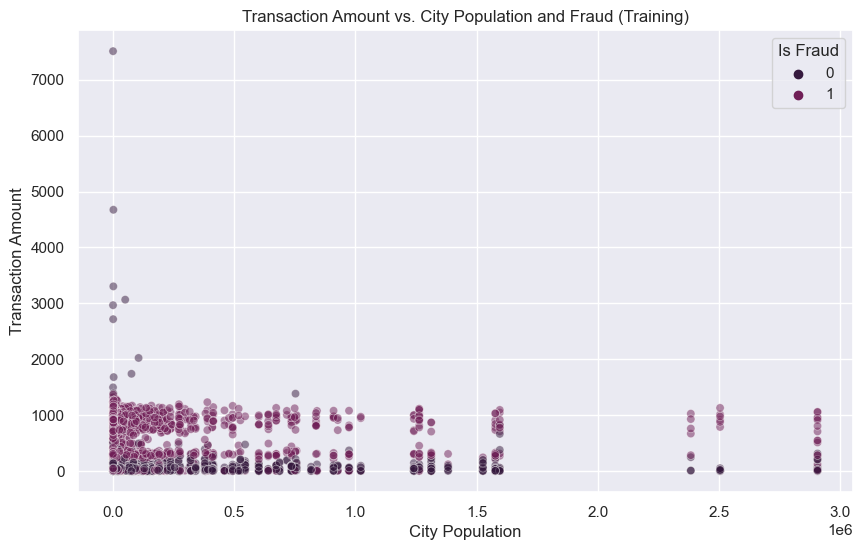

In [17]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='city_pop',y='amt',hue='is_fraud',alpha=0.5,data=df_train)
plt.title('Transaction Amount vs. City Population and Fraud (Training)')
plt.xlabel('City Population')
plt.ylabel('Transaction Amount')
plt.legend(title='Is Fraud')
plt.show()

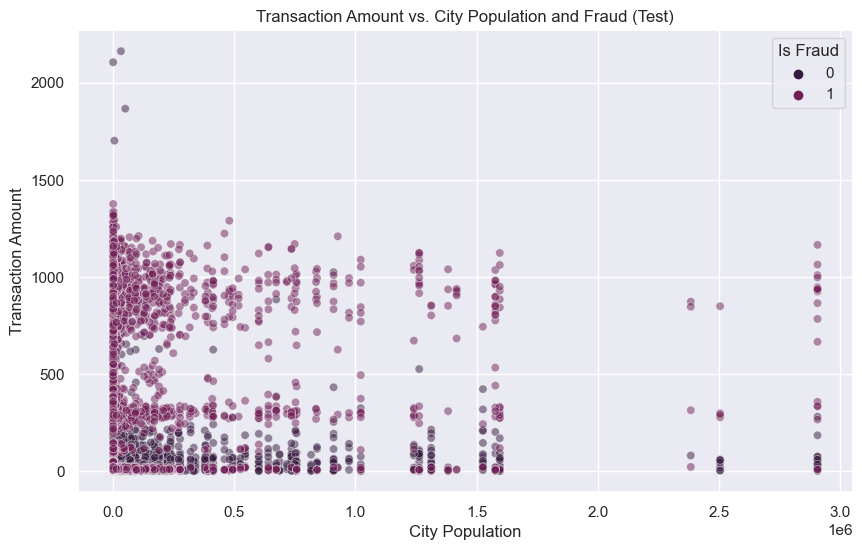

In [18]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='city_pop', y='amt', hue='is_fraud',alpha=0.5, data=df_test)
plt.title('Transaction Amount vs. City Population and Fraud (Test)')
plt.xlabel('City Population')
plt.ylabel('Transaction Amount')
plt.legend(title='Is Fraud')
plt.show()

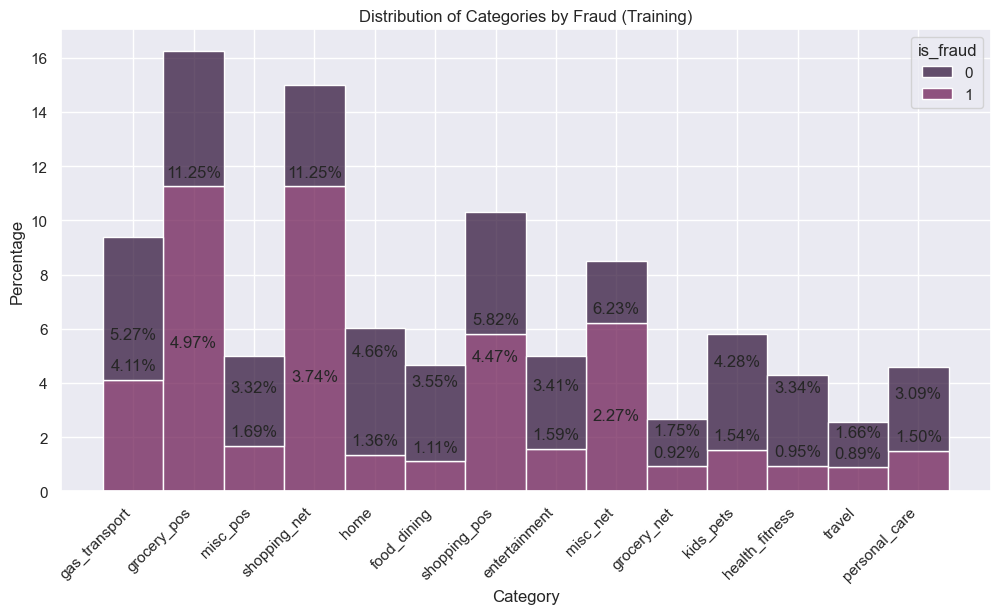

In [19]:
plt.figure(figsize=(12, 6))
ax = sns.histplot(data=df_train, x='category', hue='is_fraud', multiple='stack', stat='percent')
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}%', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.title('Distribution of Categories by Fraud (Training)')
plt.xlabel('Category')
plt.ylabel('Percentage')
plt.xticks(rotation=45, ha="right")

plt.show()

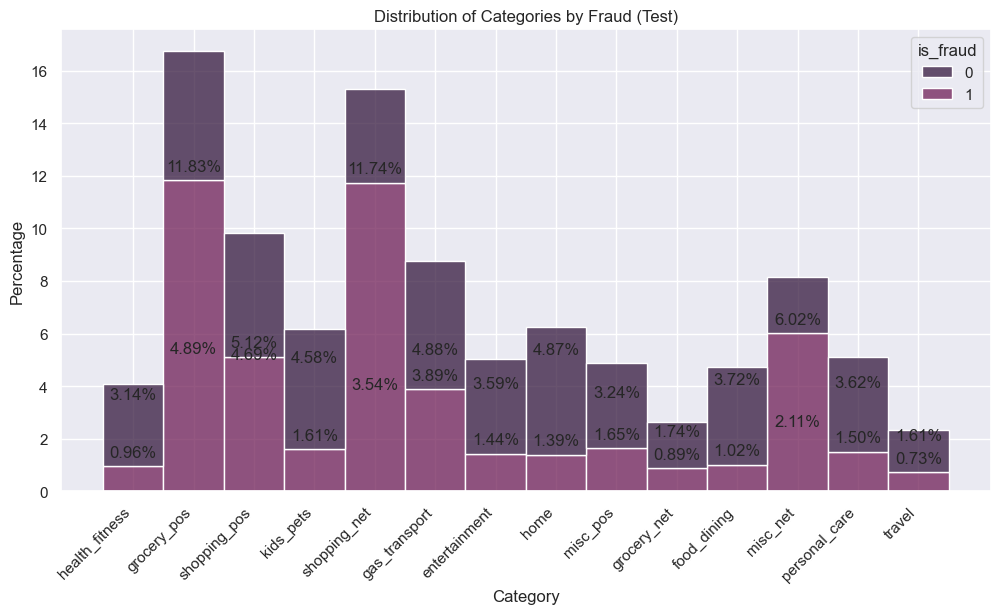

In [20]:
plt.figure(figsize=(12, 6))
ax = sns.histplot(data=df_test, x='category', hue='is_fraud', multiple='stack', stat='percent')
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}%', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.title('Distribution of Categories by Fraud (Test)')
plt.xlabel('Category')
plt.ylabel('Percentage')
plt.xticks(rotation=45, ha="right")

plt.show()

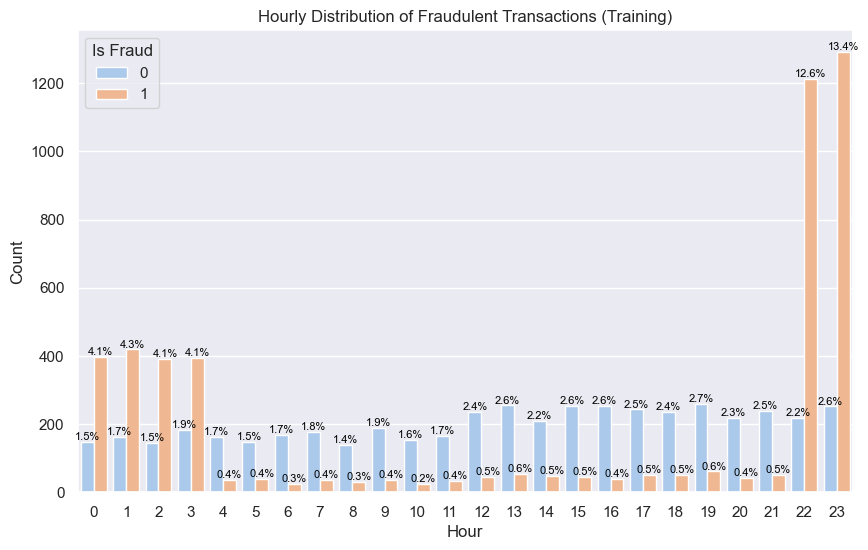

In [21]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df_train, x="hour", hue="is_fraud", dodge = True, palette='pastel')
plt.title('Hourly Distribution of Fraudulent Transactions (Training)')
plt.xlabel('Hour')
plt.ylabel('Count')
total = len(df_train['is_fraud'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.text(x, y, percentage, ha='center', va='bottom', fontsize=8, color='black')
plt.legend(title='Is Fraud')
plt.show()

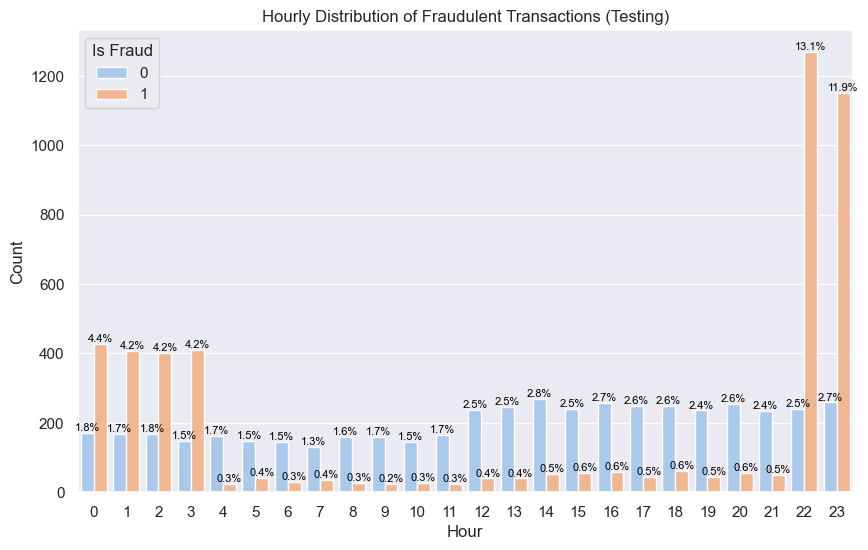

In [22]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df_test, x="hour", hue="is_fraud", dodge = True, palette='pastel')
plt.title('Hourly Distribution of Fraudulent Transactions (Testing)')
plt.xlabel('Hour')
plt.ylabel('Count')
total = len(df_train['is_fraud'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.text(x, y, percentage, ha='center', va='bottom', fontsize=8, color='black')
plt.legend(title='Is Fraud')
plt.show()

In [23]:
#Drop unnecessary columns
#We will drop lcoation of customer as we will get the distance between
#Merchant and customer location later
df.drop(columns=['street','state','first','last','trans_num','unix_time'],inplace=True)

In [24]:
df

,trans_date_trans_time,cc_num,merchant,category,amt,gender,city,zip,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud,month,day,hour,age,birth_month
0,2019-08-11 19:38:33,4681601008538160,fraud_Hermann and Sons,shopping_pos,50.81,F,Moundsville,26041,39.9148,-80.7310,16183,Physiotherapist,1977-08-12,39.238053,-81.728984,0,8,Sunday,19,42,8
1,2020-02-21 13:31:42,4653879239169997,"fraud_Cronin, Kshlerin and Weber",health_fitness,1.97,F,Smiths Grove,42171,37.0581,-86.1938,6841,"Therapist, sports",1999-06-06,36.665575,-85.608885,0,2,Friday,13,20,6
2,2019-09-03 02:39:49,4334230547694630,fraud_Rutherford-Mertz,grocery_pos,100.18,M,Freedom,83120,43.0172,-111.0292,471,"Education officer, museum",1967-08-02,43.362578,-110.580382,0,9,Tuesday,2,52,8
3,2020-03-31 02:39:04,2256234701263057,fraud_Kris-Padberg,shopping_pos,7.67,M,Grantham,3753,43.5103,-72.1334,2971,Charity fundraiser,1948-04-11,44.312773,-71.555079,0,3,Tuesday,2,72,4
4,2020-12-05 07:58:57,6011948324228984,"fraud_Towne, Greenholt and Koepp",shopping_net,478.10,F,Paris,38949,34.1992,-89.3820,297,"Administrator, local government",1961-12-14,34.362314,-89.623306,0,12,Saturday,7,59,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19297,2020-12-22 22:05:48,2242176657877538,"fraud_Willms, Kris and Bergnaum",shopping_pos,1041.51,M,Senatobia,38668,34.6323,-89.8855,14462,Database administrator,1959-03-03,34.573471,-89.911011,1,12,Tuesday,22,61,3
19298,2020-12-22 22:18:07,2242176657877538,fraud_Kuhn LLC,shopping_pos,868.09,M,Senatobia,38668,34.6323,-89.8855,14462,Database administrator,1959-03-03,34.091227,-90.390612,1,12,Tuesday,22,61,3
19299,2020-12-22 22:31:48,2242176657877538,"fraud_Mosciski, Ziemann and Farrell",shopping_net,1039.42,M,Senatobia,38668,34.6323,-89.8855,14462,Database administrator,1959-03-03,34.628434,-90.284780,1,12,Tuesday,22,61,3
19300,2020-12-22 23:06:03,2242176657877538,fraud_Bauch-Raynor,grocery_pos,289.27,M,Senatobia,38668,34.6323,-89.8855,14462,Database administrator,1959-03-03,34.746063,-90.401093,1,12,Tuesday,23,61,3


In [25]:
df.merchant.value_counts()

fraud_Kilback LLC                        100
fraud_Cormier LLC                         84
fraud_Rau and Sons                        79
fraud_Padberg-Welch                       77
fraud_Koepp-Witting                       76
                                        ... 
fraud_Wiegand-Lowe                         5
fraud_Rowe-Vandervort                      5
fraud_Funk Group                           4
fraud_Kohler, Lindgren and Koelpin         3
fraud_Hodkiewicz, Prohaska and Paucek      3
Name: merchant, Length: 693, dtype: int64

In [26]:
#clean merchant column
df['merchant'] = df['merchant'].apply(lambda x : x.replace('fraud_',''))

In [27]:
df

,trans_date_trans_time,cc_num,merchant,category,amt,gender,city,zip,lat,long,city_pop,job,dob,merch_lat,merch_long,is_fraud,month,day,hour,age,birth_month
0,2019-08-11 19:38:33,4681601008538160,Hermann and Sons,shopping_pos,50.81,F,Moundsville,26041,39.9148,-80.7310,16183,Physiotherapist,1977-08-12,39.238053,-81.728984,0,8,Sunday,19,42,8
1,2020-02-21 13:31:42,4653879239169997,"Cronin, Kshlerin and Weber",health_fitness,1.97,F,Smiths Grove,42171,37.0581,-86.1938,6841,"Therapist, sports",1999-06-06,36.665575,-85.608885,0,2,Friday,13,20,6
2,2019-09-03 02:39:49,4334230547694630,Rutherford-Mertz,grocery_pos,100.18,M,Freedom,83120,43.0172,-111.0292,471,"Education officer, museum",1967-08-02,43.362578,-110.580382,0,9,Tuesday,2,52,8
3,2020-03-31 02:39:04,2256234701263057,Kris-Padberg,shopping_pos,7.67,M,Grantham,3753,43.5103,-72.1334,2971,Charity fundraiser,1948-04-11,44.312773,-71.555079,0,3,Tuesday,2,72,4
4,2020-12-05 07:58:57,6011948324228984,"Towne, Greenholt and Koepp",shopping_net,478.10,F,Paris,38949,34.1992,-89.3820,297,"Administrator, local government",1961-12-14,34.362314,-89.623306,0,12,Saturday,7,59,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19297,2020-12-22 22:05:48,2242176657877538,"Willms, Kris and Bergnaum",shopping_pos,1041.51,M,Senatobia,38668,34.6323,-89.8855,14462,Database administrator,1959-03-03,34.573471,-89.911011,1,12,Tuesday,22,61,3
19298,2020-12-22 22:18:07,2242176657877538,Kuhn LLC,shopping_pos,868.09,M,Senatobia,38668,34.6323,-89.8855,14462,Database administrator,1959-03-03,34.091227,-90.390612,1,12,Tuesday,22,61,3
19299,2020-12-22 22:31:48,2242176657877538,"Mosciski, Ziemann and Farrell",shopping_net,1039.42,M,Senatobia,38668,34.6323,-89.8855,14462,Database administrator,1959-03-03,34.628434,-90.284780,1,12,Tuesday,22,61,3
19300,2020-12-22 23:06:03,2242176657877538,Bauch-Raynor,grocery_pos,289.27,M,Senatobia,38668,34.6323,-89.8855,14462,Database administrator,1959-03-03,34.746063,-90.401093,1,12,Tuesday,23,61,3


In [28]:
df[['merchant']].head()

,merchant
0,Hermann and Sons
1,"Cronin, Kshlerin and Weber"
2,Rutherford-Mertz
3,Kris-Padberg
4,"Towne, Greenholt and Koepp"


In [29]:
#Date of birth --> Age of customer
df['dob'] = pd.to_datetime(df['dob'],format='mixed')
df['age'] = (df['trans_date_trans_time'].dt.year - df['dob'].dt.year).astype(int)
df.drop(columns='dob',inplace=True)

In [30]:
df

,trans_date_trans_time,cc_num,merchant,category,amt,gender,city,zip,lat,long,city_pop,job,merch_lat,merch_long,is_fraud,month,day,hour,age,birth_month
0,2019-08-11 19:38:33,4681601008538160,Hermann and Sons,shopping_pos,50.81,F,Moundsville,26041,39.9148,-80.7310,16183,Physiotherapist,39.238053,-81.728984,0,8,Sunday,19,42,8
1,2020-02-21 13:31:42,4653879239169997,"Cronin, Kshlerin and Weber",health_fitness,1.97,F,Smiths Grove,42171,37.0581,-86.1938,6841,"Therapist, sports",36.665575,-85.608885,0,2,Friday,13,21,6
2,2019-09-03 02:39:49,4334230547694630,Rutherford-Mertz,grocery_pos,100.18,M,Freedom,83120,43.0172,-111.0292,471,"Education officer, museum",43.362578,-110.580382,0,9,Tuesday,2,52,8
3,2020-03-31 02:39:04,2256234701263057,Kris-Padberg,shopping_pos,7.67,M,Grantham,3753,43.5103,-72.1334,2971,Charity fundraiser,44.312773,-71.555079,0,3,Tuesday,2,72,4
4,2020-12-05 07:58:57,6011948324228984,"Towne, Greenholt and Koepp",shopping_net,478.10,F,Paris,38949,34.1992,-89.3820,297,"Administrator, local government",34.362314,-89.623306,0,12,Saturday,7,59,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19297,2020-12-22 22:05:48,2242176657877538,"Willms, Kris and Bergnaum",shopping_pos,1041.51,M,Senatobia,38668,34.6323,-89.8855,14462,Database administrator,34.573471,-89.911011,1,12,Tuesday,22,61,3
19298,2020-12-22 22:18:07,2242176657877538,Kuhn LLC,shopping_pos,868.09,M,Senatobia,38668,34.6323,-89.8855,14462,Database administrator,34.091227,-90.390612,1,12,Tuesday,22,61,3
19299,2020-12-22 22:31:48,2242176657877538,"Mosciski, Ziemann and Farrell",shopping_net,1039.42,M,Senatobia,38668,34.6323,-89.8855,14462,Database administrator,34.628434,-90.284780,1,12,Tuesday,22,61,3
19300,2020-12-22 23:06:03,2242176657877538,Bauch-Raynor,grocery_pos,289.27,M,Senatobia,38668,34.6323,-89.8855,14462,Database administrator,34.746063,-90.401093,1,12,Tuesday,23,61,3


In [31]:
#Location between customer home and merchant
df['distance_km'] = df.apply(lambda col : round(great_circle((col['lat'],col['long']),
                                         (col['merch_lat'],col['merch_long'])).kilometers,2),axis=1)

In [32]:
df

,trans_date_trans_time,cc_num,merchant,category,amt,gender,city,zip,lat,long,city_pop,job,merch_lat,merch_long,is_fraud,month,day,hour,age,birth_month,distance_km
0,2019-08-11 19:38:33,4681601008538160,Hermann and Sons,shopping_pos,50.81,F,Moundsville,26041,39.9148,-80.7310,16183,Physiotherapist,39.238053,-81.728984,0,8,Sunday,19,42,8,113.92
1,2020-02-21 13:31:42,4653879239169997,"Cronin, Kshlerin and Weber",health_fitness,1.97,F,Smiths Grove,42171,37.0581,-86.1938,6841,"Therapist, sports",36.665575,-85.608885,0,2,Friday,13,21,6,67.92
2,2019-09-03 02:39:49,4334230547694630,Rutherford-Mertz,grocery_pos,100.18,M,Freedom,83120,43.0172,-111.0292,471,"Education officer, museum",43.362578,-110.580382,0,9,Tuesday,2,52,8,52.90
3,2020-03-31 02:39:04,2256234701263057,Kris-Padberg,shopping_pos,7.67,M,Grantham,3753,43.5103,-72.1334,2971,Charity fundraiser,44.312773,-71.555079,0,3,Tuesday,2,72,4,100.54
4,2020-12-05 07:58:57,6011948324228984,"Towne, Greenholt and Koepp",shopping_net,478.10,F,Paris,38949,34.1992,-89.3820,297,"Administrator, local government",34.362314,-89.623306,0,12,Saturday,7,59,12,28.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19297,2020-12-22 22:05:48,2242176657877538,"Willms, Kris and Bergnaum",shopping_pos,1041.51,M,Senatobia,38668,34.6323,-89.8855,14462,Database administrator,34.573471,-89.911011,1,12,Tuesday,22,61,3,6.95
19298,2020-12-22 22:18:07,2242176657877538,Kuhn LLC,shopping_pos,868.09,M,Senatobia,38668,34.6323,-89.8855,14462,Database administrator,34.091227,-90.390612,1,12,Tuesday,22,61,3,75.96
19299,2020-12-22 22:31:48,2242176657877538,"Mosciski, Ziemann and Farrell",shopping_net,1039.42,M,Senatobia,38668,34.6323,-89.8855,14462,Database administrator,34.628434,-90.284780,1,12,Tuesday,22,61,3,36.53
19300,2020-12-22 23:06:03,2242176657877538,Bauch-Raynor,grocery_pos,289.27,M,Senatobia,38668,34.6323,-89.8855,14462,Database administrator,34.746063,-90.401093,1,12,Tuesday,23,61,3,48.81


In [33]:
df.drop(columns=['lat','long','merch_lat','merch_long'],inplace=True)

In [34]:
#Summary stats
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cc_num,19302.0,4.031783e+17,1.286824e+18,6.041621e+10,1.800206e+14,3.522829e+15,4.634956e+15,4.992346e+18
amt,19302.0,2.994013e+02,3.756726e+02,1.000000e+00,2.035000e+01,8.801500e+01,4.795950e+02,7.508460e+03
zip,19302.0,4.878668e+04,2.704976e+04,1.257000e+03,2.604100e+04,4.804300e+04,7.201100e+04,9.992100e+04
city_pop,19302.0,8.894424e+04,3.018630e+05,2.300000e+01,7.600000e+02,2.526000e+03,1.968500e+04,2.906700e+06
is_fraud,19302.0,5.000000e-01,5.000130e-01,0.000000e+00,0.000000e+00,5.000000e-01,1.000000e+00,1.000000e+00
month,19302.0,6.754999e+00,3.477986e+00,1.000000e+00,4.000000e+00,7.000000e+00,1.000000e+01,1.200000e+01
hour,19302.0,1.339954e+01,8.405531e+00,0.000000e+00,4.000000e+00,1.500000e+01,2.200000e+01,2.300000e+01
age,19302.0,4.756196e+01,1.803992e+01,1.400000e+01,3.300000e+01,4.600000e+01,5.900000e+01,9.600000e+01
birth_month,19302.0,6.495493e+00,3.424594e+00,1.000000e+00,4.000000e+00,6.000000e+00,9.000000e+00,1.200000e+01
distance_km,19302.0,7.617019e+01,2.891031e+01,7.400000e-01,5.548000e+01,7.809000e+01,9.842000e+01,1.450900e+02


In [35]:
df.describe(include='object').T

,count,unique,top,freq
merchant,19302,693,Kilback LLC,100
category,19302,14,grocery_pos,3180
gender,19302,2,F,10212
city,19302,906,Birmingham,74
job,19302,497,Naval architect,125
day,19302,7,Monday,3446


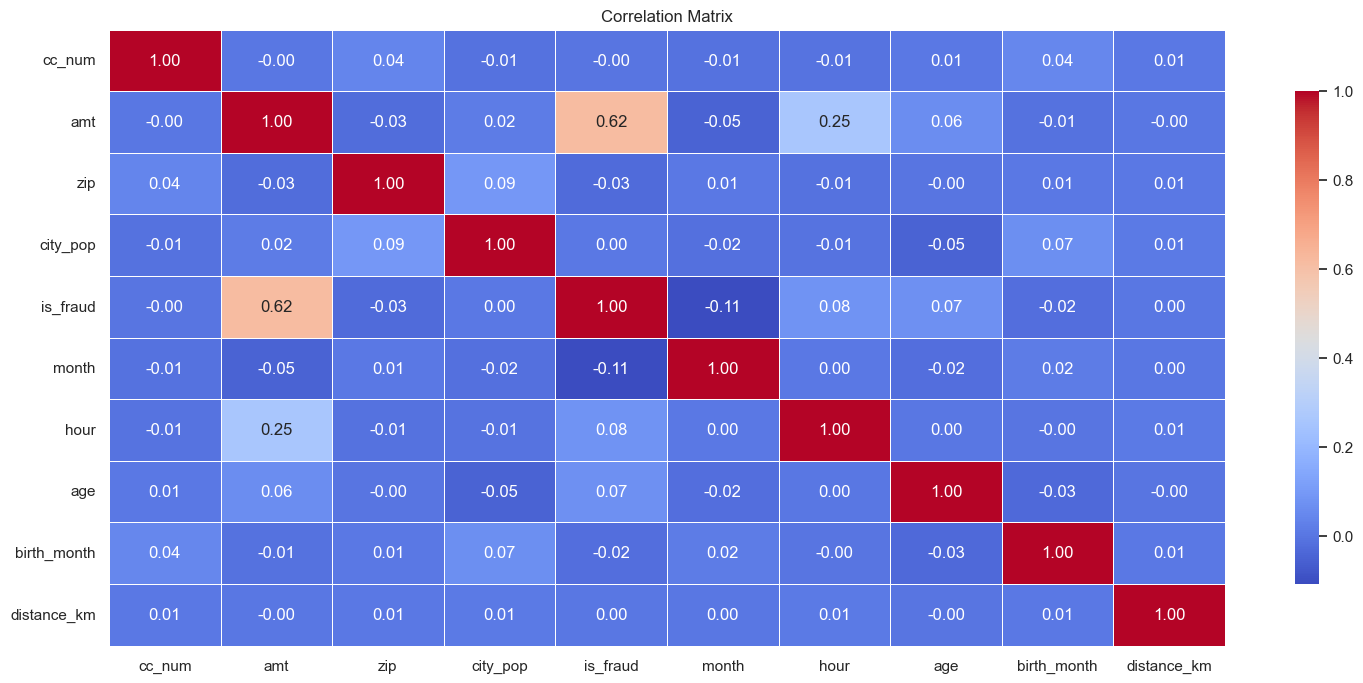

In [36]:
#Check corr between numeric values
sns.heatmap(df.select_dtypes(include='number').corr(),
            annot=True,cmap='coolwarm',fmt='.2f',linewidths=0.5,cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix')
plt.show()

In [37]:
#We can't detect a clear corr between features
df.select_dtypes(include='number').corr()

,cc_num,amt,zip,city_pop,is_fraud,month,hour,age,birth_month,distance_km
cc_num,1.000000,-0.000372,0.038359,-0.012109,-0.004771,-0.010744,-0.007660,0.006697,0.044176,0.006921
amt,-0.000372,1.000000,-0.026216,0.015627,0.615605,-0.052361,0.254911,0.063844,-0.011165,-0.000565
zip,0.038359,-0.026216,1.000000,0.094007,-0.029097,0.006609,-0.009927,-0.003746,0.005205,0.007410
city_pop,-0.012109,0.015627,0.094007,1.000000,0.003492,-0.016989,-0.009202,-0.051241,0.065991,0.008840
is_fraud,-0.004771,0.615605,-0.029097,0.003492,1.000000,-0.109235,0.077256,0.070727,-0.021483,0.002980
month,-0.010744,-0.052361,0.006609,-0.016989,-0.109235,1.000000,0.003515,-0.019061,0.015956,0.002352
hour,-0.007660,0.254911,-0.009927,-0.009202,0.077256,0.003515,1.000000,0.001741,-0.001608,0.011312
age,0.006697,0.063844,-0.003746,-0.051241,0.070727,-0.019061,0.001741,1.000000,-0.031364,-0.001557
birth_month,0.044176,-0.011165,0.005205,0.065991,-0.021483,0.015956,-0.001608,-0.031364,1.000000,0.006285
distance_km,0.006921,-0.000565,0.007410,0.008840,0.002980,0.002352,0.011312,-0.001557,0.006285,1.000000


##### Get in depth in data

In [38]:
#Function to visualize determined data
def bar_plot(col):
    def top_frauds(col):
        return pd.DataFrame(df.loc[df['is_fraud']==1,[col]].value_counts()).reset_index().head(10)
    ax=sns.barplot(data=top_frauds(col),x=col,y='count',palette='bone')
    ax.bar_label(ax.containers[0])
    plt.title(f'Top 10 Frauds | {col}',fontsize=16,fontweight='bold')
    plt.xticks(rotation=45,fontweight='bold')

ValueError: Could not interpret input 'count'

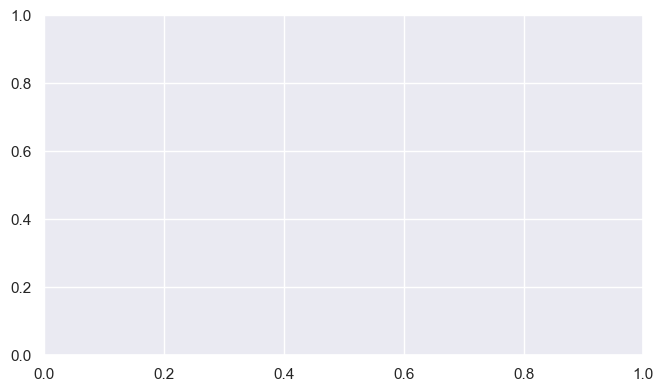

In [39]:
plt.figure(figsize=(17,15))
for idx,val in enumerate(['cc_num','merchant','category','city','job','age']):
    plt.subplot(3,2,idx+1)
    bar_plot(val)
plt.tight_layout()

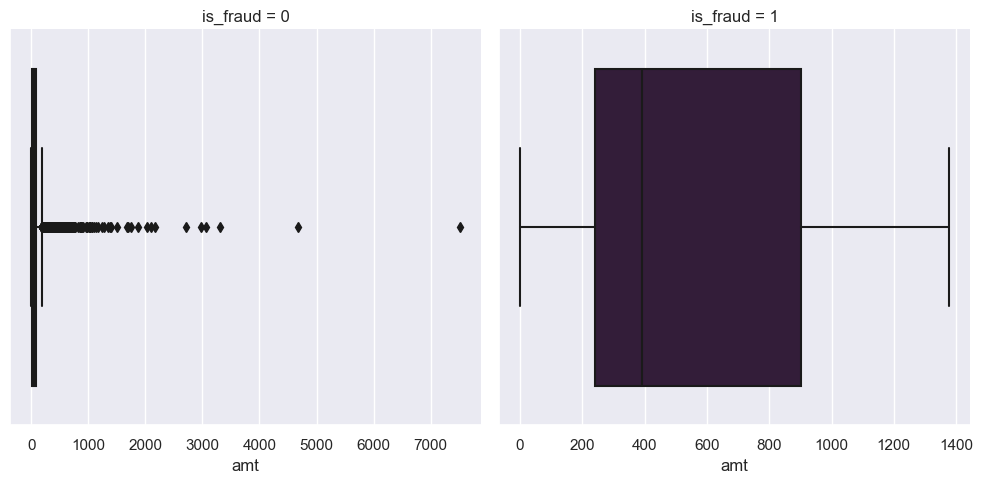

In [40]:
#Amount
sns.catplot(data=df,x='amt',col='is_fraud',kind='box',sharex=False)

In [41]:
#We detect a huge number of outliers in the amounts of genuine transaction
#We will handle that in the scaling process since we can't remove them
#Because they represent real data

In [42]:
def pie_bar_plot(col):
    print(df[col].value_counts())
    sns.set_palette('viridis')
    fig,axs=plt.subplots(1,2)
    axs[0].pie(df[col].value_counts().values.tolist(),autopct='%.2f%%',textprops={'fontsize':25},explode=[0,0.05],shadow=True)
    sns.countplot(data=df,x=col,ax=axs[1])
    fig.legend(labels=df[col].value_counts().index.tolist(),loc='upper left',fontsize=20)
    fig.tight_layout()
    fig.show()

F    10212
M     9090
Name: gender, dtype: int64


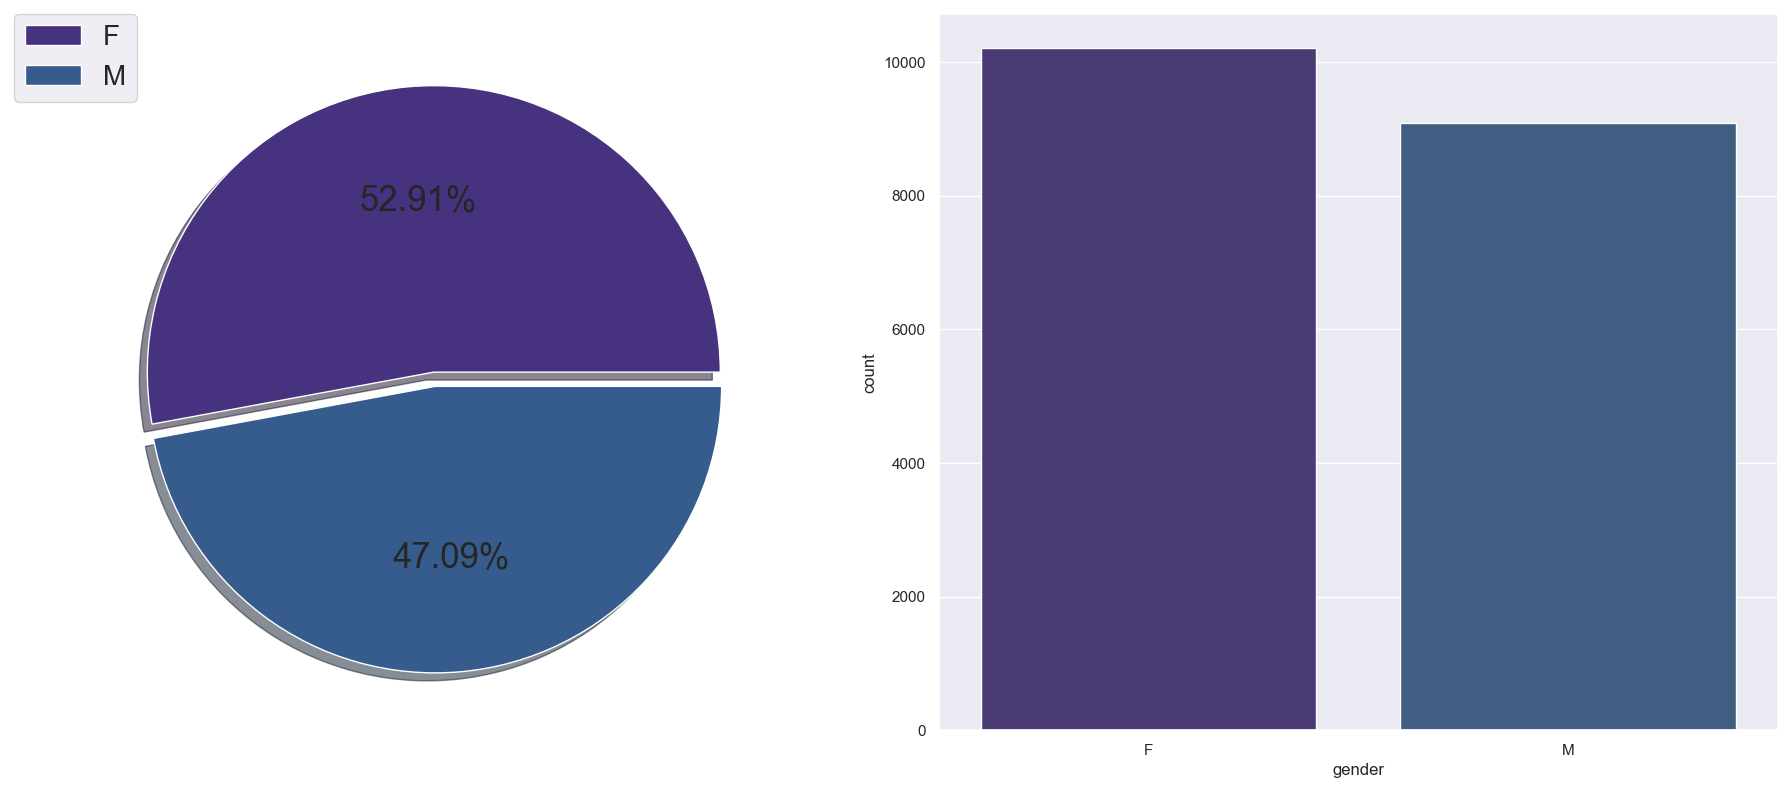

In [43]:
#Gender
pie_bar_plot('gender')

0    9651
1    9651
Name: is_fraud, dtype: int64


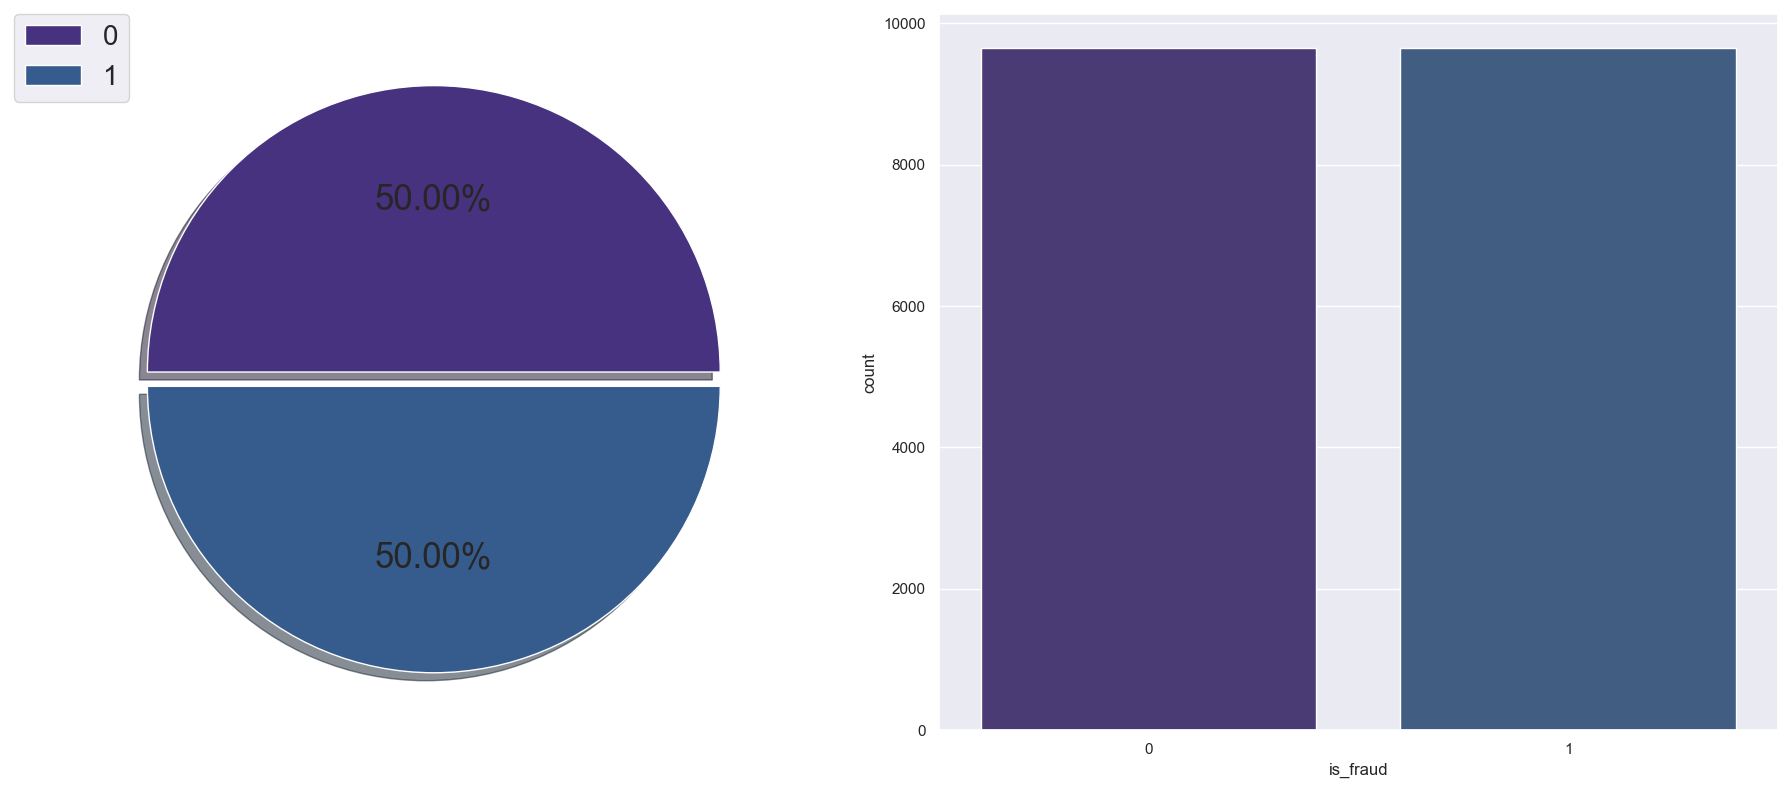

In [44]:
#Frauds
pie_bar_plot('is_fraud')

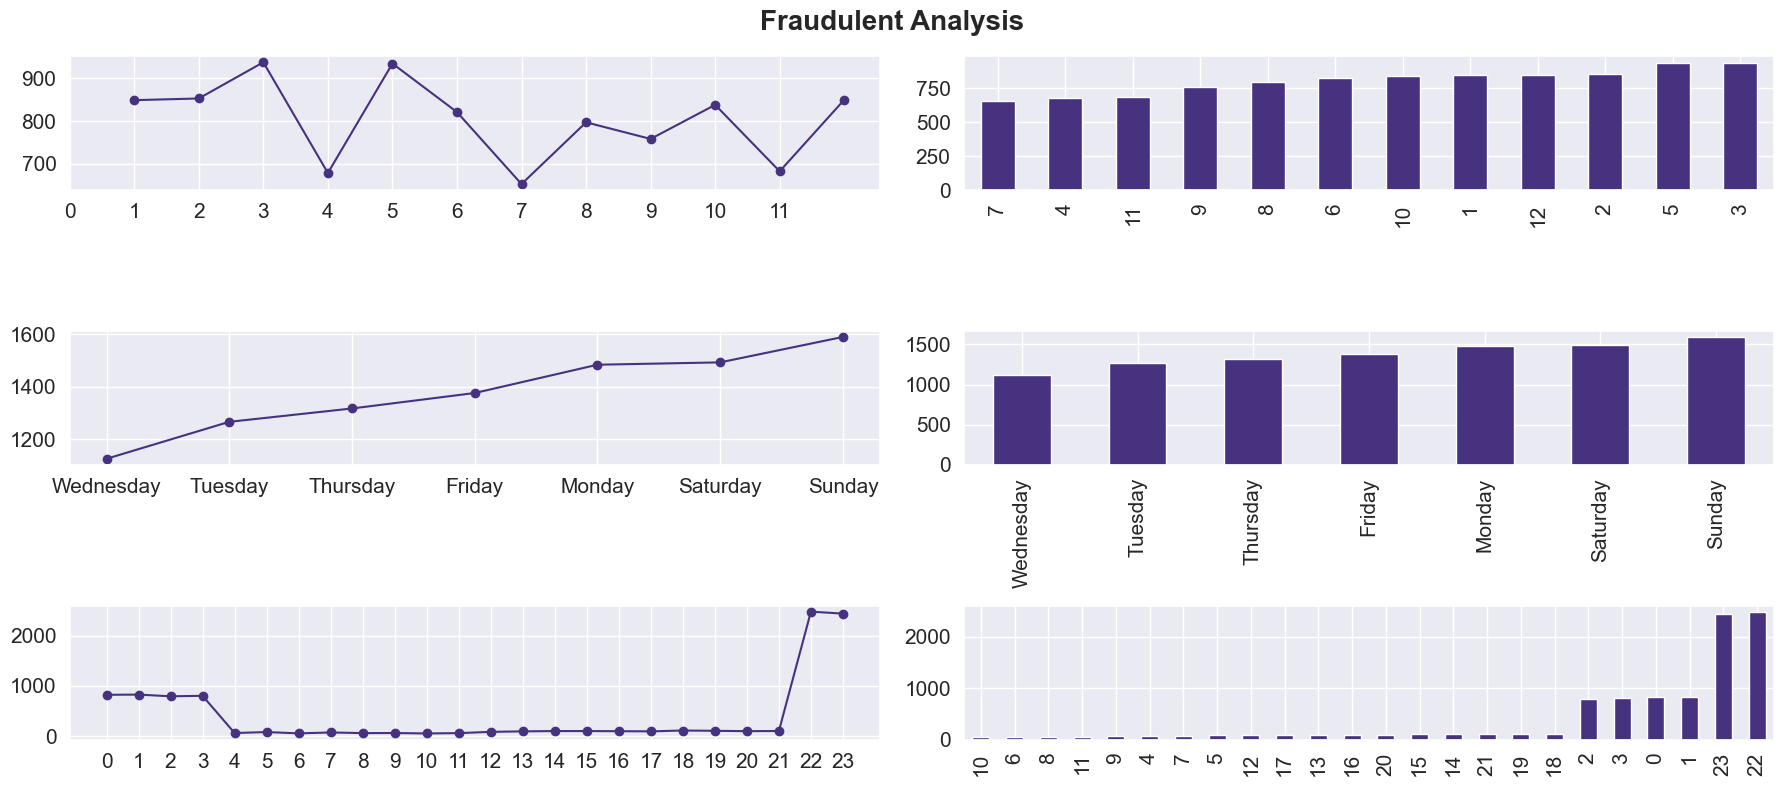

In [45]:
#What is the most month|day|hour frauds occur?
fig,axs = plt.subplots(3,2)
#Month
df.loc[df['is_fraud']==1,'month'].value_counts().sort_index().plot(kind='line',ax=axs[0,0],marker='o',fontsize=15)
axs[0,0].set_xticks(range(0,12))
df.loc[df['is_fraud']==1,'month'].value_counts(ascending=True).plot(kind='bar',ax=axs[0,1],fontsize=15)
fig.suptitle('Fraudulent Analysis', fontsize=18, fontweight='bold')
##Day
df.loc[df['is_fraud']==1,'day'].value_counts(ascending=True).plot(kind='line',ax=axs[1,0],marker='o',fontsize=15)
df.loc[df['is_fraud']==1,'day'].value_counts(ascending=True).plot(kind='bar',ax=axs[1,1],fontsize=15)
#Hour 
df.loc[df['is_fraud']==1,'hour'].value_counts().sort_index().plot(kind='line',ax=axs[2,0],marker='o',fontsize=15)
axs[2,0].set_xticks(range(0,24))
df.loc[df['is_fraud']==1,'hour'].value_counts(ascending=True).plot(kind='bar',ax=axs[2,1],fontsize=15)
fig.suptitle('Fraudulent Analysis', fontsize=20, fontweight='bold')
plt.tight_layout()

#### We conclude that most fraud transactions occurs: 
- In March
- On Sunday
- At 10 PM

In [46]:
df.loc[df['is_fraud']==1,['gender']].value_counts()
#Males and females exposed to fraud equally (approximately)

gender
F         4899
M         4752
dtype: int64

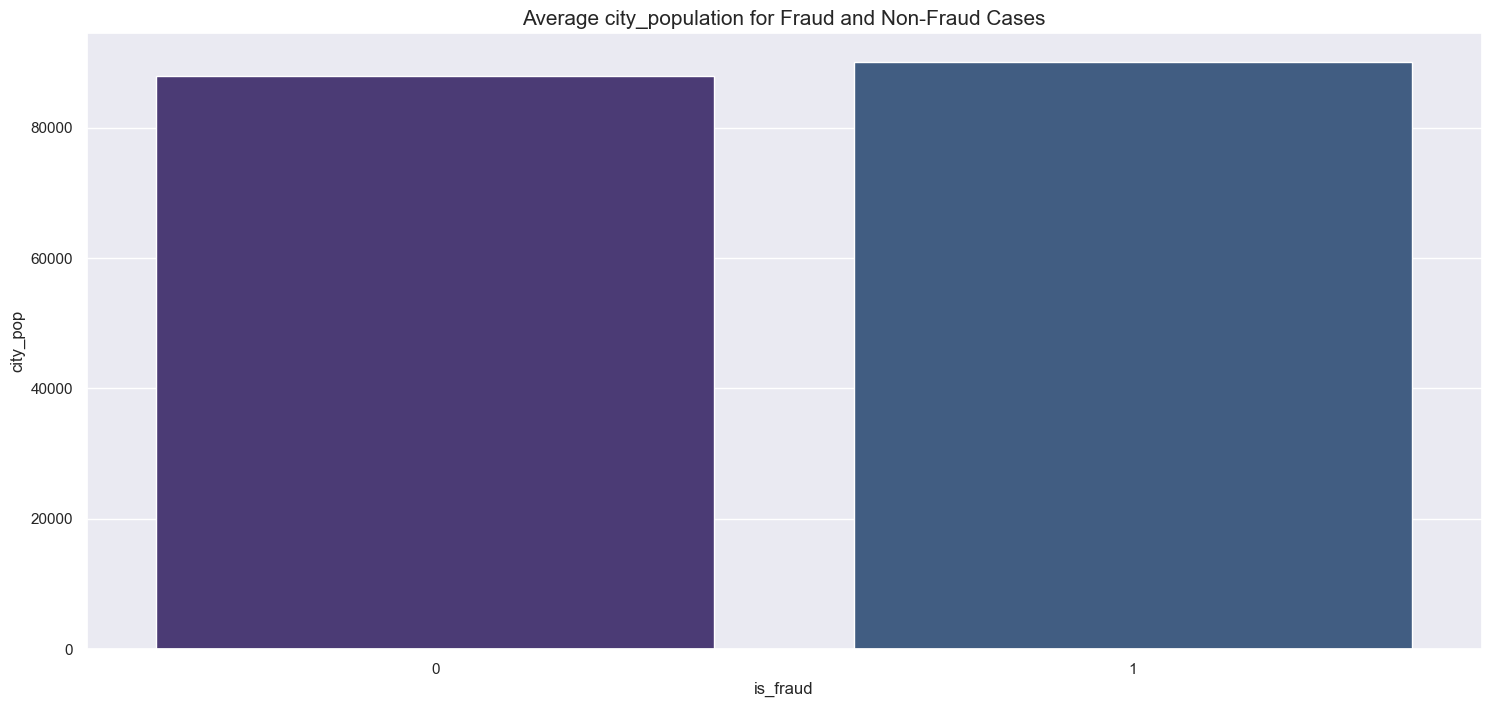

T-test: t-statistic = 0.485, p-value = 0.628, p-value<0.05? False


In [47]:
sns.barplot(data=df,x='is_fraud', y='city_pop', ci=None)
plt.title('Average city_population for Fraud and Non-Fraud Cases',fontsize=15)
plt.show()

fraud_population = df[df['is_fraud'] == 1]['city_pop']
non_fraud_population = df[df['is_fraud'] == 0]['city_pop']
t_stat, p_value = ttest_ind(fraud_population, non_fraud_population)
print(f'T-test: t-statistic = {round(t_stat,3)}, p-value = {round(p_value,3)}, p-value<0.05? {p_value<0.05}')

In [48]:

#Since we accept the null hypothesis,we conclude that there is no significant difference between means,
#We conclude also that city_population does not help us on the target(is_fraud), so we will drop it

# Further Preprocessing

In [49]:
df.head(3)

,trans_date_trans_time,cc_num,merchant,category,amt,gender,city,zip,city_pop,job,is_fraud,month,day,hour,age,birth_month,distance_km
0,2019-08-11 19:38:33,4681601008538160,Hermann and Sons,shopping_pos,50.81,F,Moundsville,26041,16183,Physiotherapist,0,8,Sunday,19,42,8,113.92
1,2020-02-21 13:31:42,4653879239169997,"Cronin, Kshlerin and Weber",health_fitness,1.97,F,Smiths Grove,42171,6841,"Therapist, sports",0,2,Friday,13,21,6,67.92
2,2019-09-03 02:39:49,4334230547694630,Rutherford-Mertz,grocery_pos,100.18,M,Freedom,83120,471,"Education officer, museum",0,9,Tuesday,2,52,8,52.90


In [50]:
#Convert gender to binary classification
df = pd.get_dummies(df,columns=['gender'],drop_first=True)

In [51]:
#We will get the time between transactions for each card
#Time=0 for every first transaction and time will be represented in hours.
df.sort_values(['cc_num', 'trans_date_trans_time'],inplace=True)
df['hours_diff_bet_trans']=((df.groupby('cc_num')[['trans_date_trans_time']].diff())/np.timedelta64(1,'h'))

In [52]:
df

,trans_date_trans_time,cc_num,merchant,category,amt,city,zip,city_pop,job,is_fraud,month,day,hour,age,birth_month,distance_km,gender_M,hours_diff_bet_trans
10674,2019-03-01 01:32:53,60416207185,Marks Inc,gas_transport,13.17,Fort Washakie,82514,1645,Information systems manager,1,3,Friday,1,33,2,48.05,0,NaN
10675,2019-03-01 02:42:25,60416207185,Cummings LLC,gas_transport,11.74,Fort Washakie,82514,1645,Information systems manager,1,3,Friday,2,33,2,88.19,0,1.158889
10679,2019-03-01 23:06:58,60416207185,Labadie LLC,personal_care,19.16,Fort Washakie,82514,1645,Information systems manager,1,3,Friday,23,33,2,114.98,0,20.409167
10682,2019-03-02 22:10:38,60416207185,Barrows PLC,shopping_pos,830.06,Fort Washakie,82514,1645,Information systems manager,1,3,Saturday,22,33,2,80.65,0,23.061111
10683,2019-03-02 22:10:59,60416207185,"Windler, Goodwin and Kovacek",home,261.79,Fort Washakie,82514,1645,Information systems manager,1,3,Saturday,22,33,2,96.18,0,0.005833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1668,2020-09-22 01:07:18,4992346398065154184,Gleason-Macejkovic,shopping_net,8.47,Mc Nabb,61335,532,Audiological scientist,0,9,Tuesday,1,64,1,99.00,1,1503.203333
989,2020-10-26 09:37:41,4992346398065154184,Kling Inc,gas_transport,33.77,Mc Nabb,61335,532,Audiological scientist,0,10,Monday,9,64,1,99.98,1,824.506389
1749,2020-11-14 16:14:48,4992346398065154184,Lynch-Wisozk,home,4.26,Mc Nabb,61335,532,Audiological scientist,0,11,Saturday,16,64,1,72.74,1,462.618611
3792,2020-11-16 06:00:51,4992346398065154184,"Moen, Reinger and Murphy",grocery_pos,109.87,Mc Nabb,61335,532,Audiological scientist,0,11,Monday,6,64,1,108.22,1,37.767500


In [53]:
df.loc[df['hours_diff_bet_trans'].isna(),'hours_diff_bet_trans'] = 0
df['hours_diff_bet_trans'] = df['hours_diff_bet_trans'].astype(int)

                T  p-val
T-test  62.994912    0.0


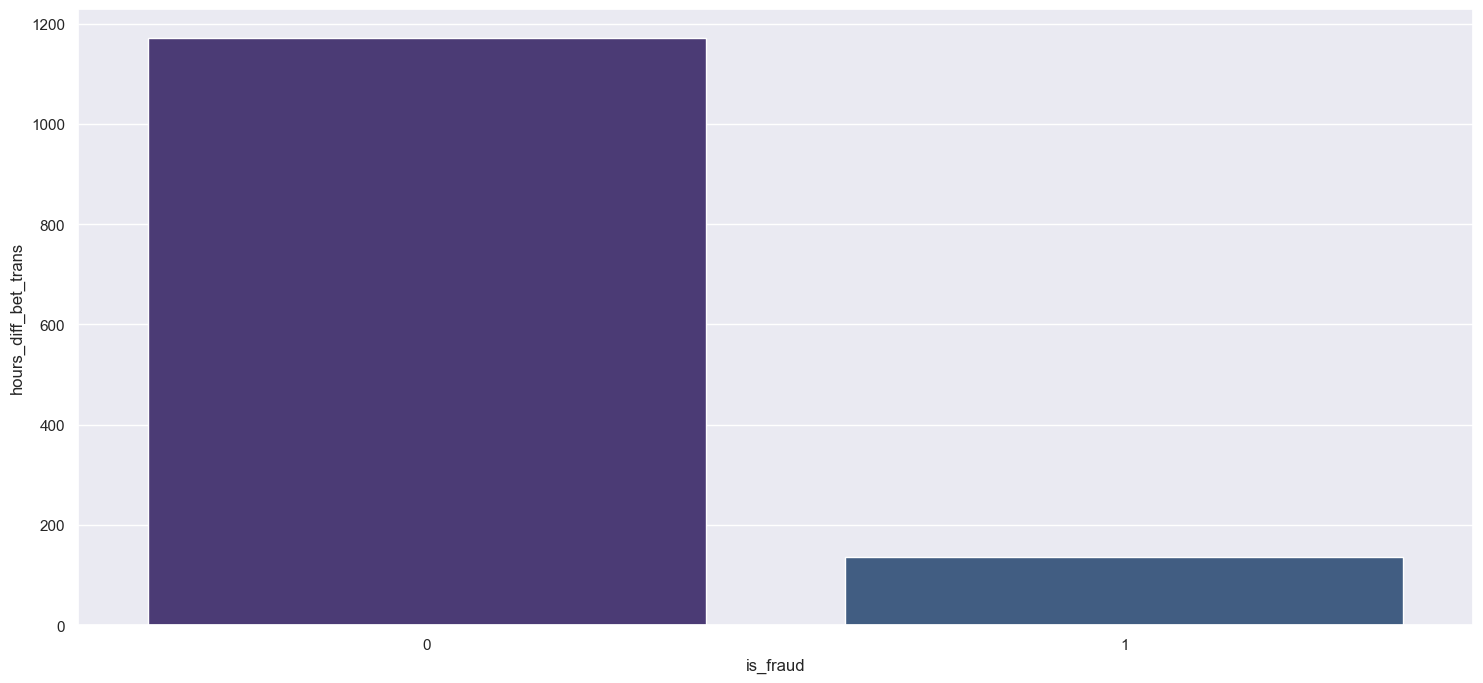

In [54]:
# x_0=df.groupby('is_fraud')['hours_diff_bet_trans'].mean().values[0]
# x_1=df.groupby('is_fraud')['hours_diff_bet_trans'].mean().values[1]
# std_0=df.groupby('is_fraud')['hours_diff_bet_trans'].std().values[0]
# std_1=df.groupby('is_fraud')['hours_diff_bet_trans'].std().values[1]
# n_0=df.groupby('is_fraud')['hours_diff_bet_trans'].count().values[0]
# n_1=df.groupby('is_fraud')['hours_diff_bet_trans'].count().values[1]
# numerator = x_0 - x_1
# domin = np.sqrt(std_0**2/n_0 + std_1**2/n_1)
# t_stat=numerator/domin
# p_val = 2*(1-t.cdf(abs(t_stat),df=n_0+n_1-2))
# print(t_stat,p_val)
#----------------------
#The power of pingouin library!
print(pingouin.ttest(df[df['is_fraud'] == 0]['hours_diff_bet_trans'],
              df[df['is_fraud'] == 1]['hours_diff_bet_trans'],
              alternative='two-sided')[['T','p-val']])
sns.barplot(data=df,x='is_fraud',y='hours_diff_bet_trans',ci=None)
plt.show()

In [55]:
#Since p-val < 0.05,we reject the null hypothesis.
#The mean of hours is significantly different between frauds and non-frauds transactions

In [56]:
#Make day feature numerical
df['day'] = df['trans_date_trans_time'].dt.weekday

In [57]:
#Handling and extracting features from cc_num
freq = df.groupby('cc_num').size()
df['cc_freq'] = df['cc_num'].apply(lambda x : freq[x])
df[['cc_num','cc_freq']].head()

,cc_num,cc_freq
10674,60416207185,17
10675,60416207185,17
10679,60416207185,17
10682,60416207185,17
10683,60416207185,17


In [58]:
#We got freq for each cc_num
def hist_show(col):
    fig,axs = plt.subplots(1,2,sharex=True)
    for i in [0,1]:
        sns.histplot(df[df["is_fraud"]==i][col], bins=6,ax=axs[i])

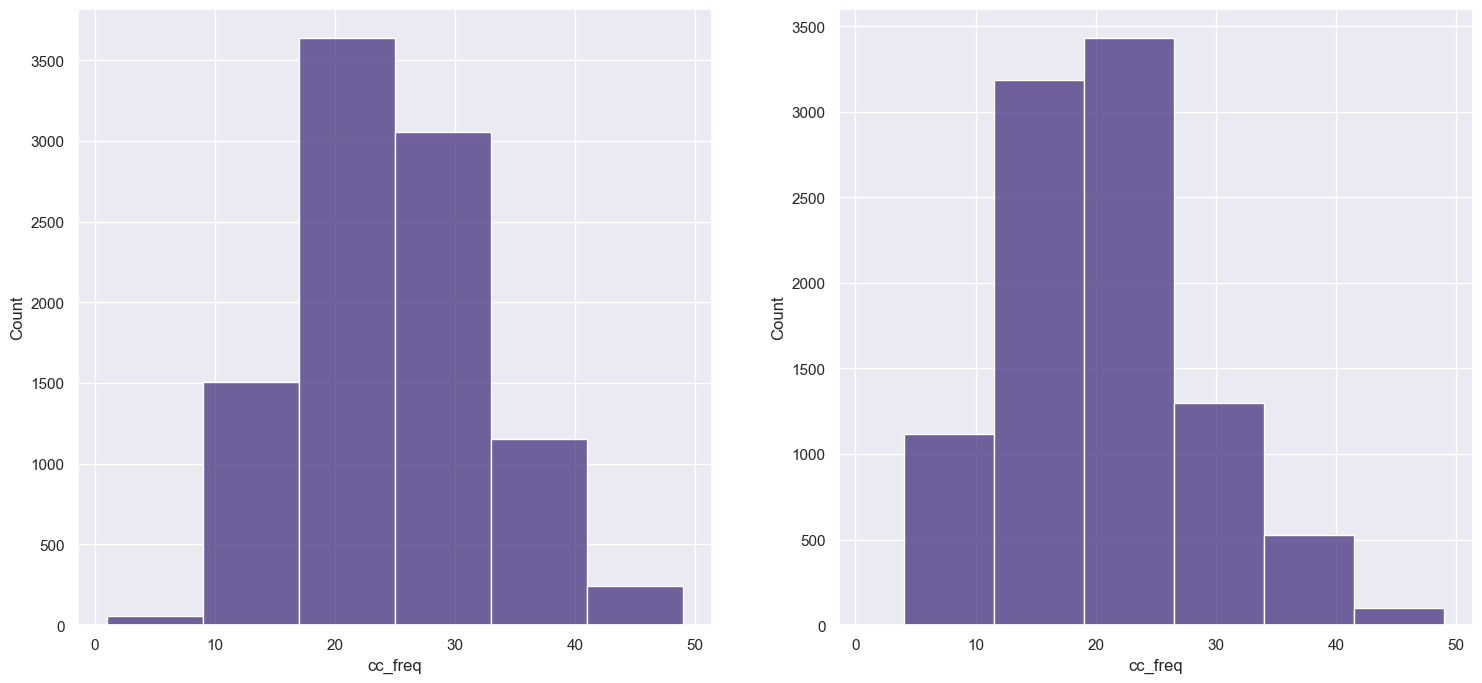

In [59]:
hist_show('cc_freq')

In [60]:
def class_det(x):
    for idx,val in enumerate(list(range(800,5000,800))):
        if x < val:
            return idx+1


In [61]:
df['cc_freq_class'] = df['cc_freq'].apply(class_det)
print(df['cc_freq_class'])

10674    1
10675    1
10679    1
10682    1
10683    1
        ..
1668     1
989      1
1749     1
3792     1
942      1
Name: cc_freq_class, Length: 19302, dtype: int64


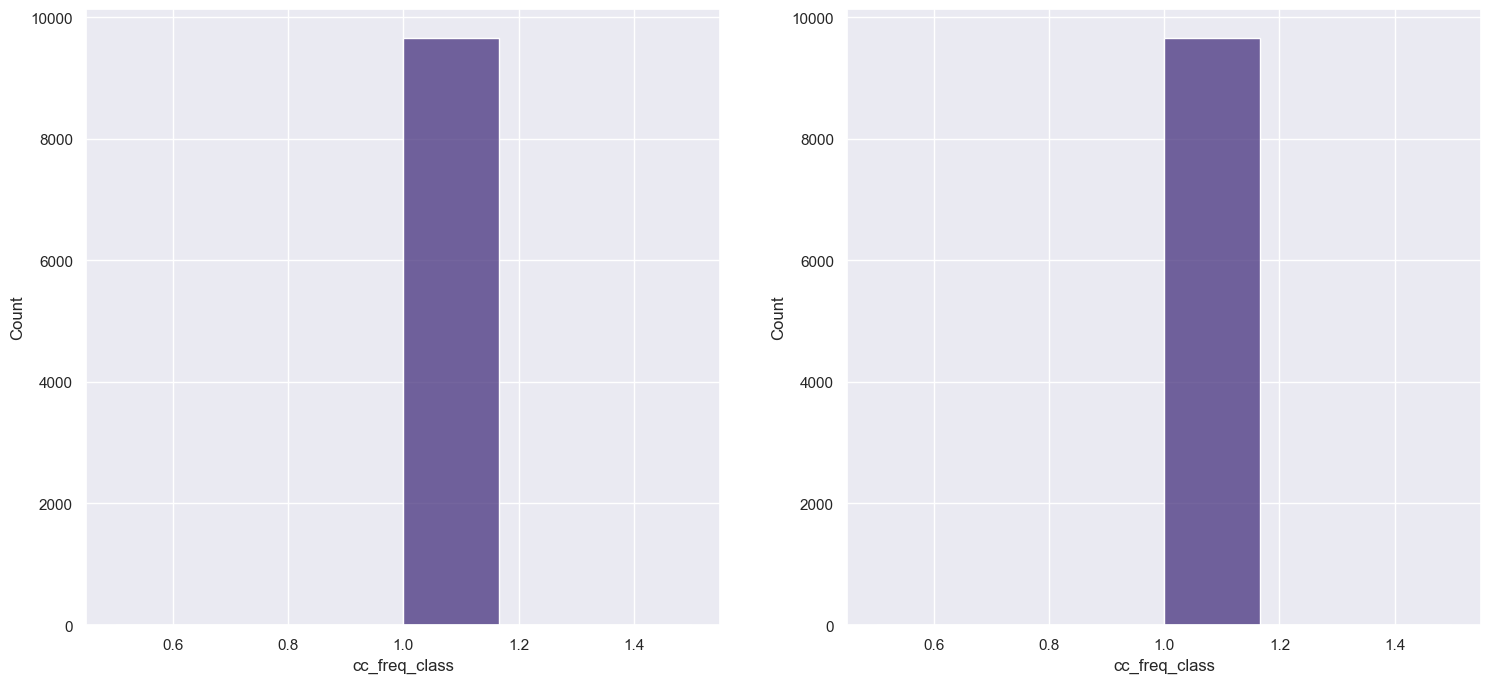

In [62]:
hist_show('cc_freq_class')

#### Now clearly frauds occurs more in credit cards with less use (new ones) and for genuine transactions, it follows a normal distribution.

In [63]:
#Drop unecessary columns
df.drop(columns=['cc_num','trans_date_trans_time','city_pop'],inplace=True)

In [64]:
df.columns

Index(['merchant', 'category', 'amt', 'city', 'zip', 'job', 'is_fraud',
       'month', 'day', 'hour', 'age', 'birth_month', 'distance_km', 'gender_M',
       'hours_diff_bet_trans', 'cc_freq', 'cc_freq_class'],
      dtype='object')

In [65]:
#Reorder columns
df = df[['cc_freq','cc_freq_class','city','job','age','gender_M','merchant', 'category',
         'distance_km','month','day','hour','hours_diff_bet_trans','amt','is_fraud']]
df.head(20)

,cc_freq,cc_freq_class,city,job,age,gender_M,merchant,category,distance_km,month,day,hour,hours_diff_bet_trans,amt,is_fraud
10674,17,1,Fort Washakie,Information systems manager,33,0,Marks Inc,gas_transport,48.05,3,4,1,0,13.17,1
10675,17,1,Fort Washakie,Information systems manager,33,0,Cummings LLC,gas_transport,88.19,3,4,2,1,11.74,1
10679,17,1,Fort Washakie,Information systems manager,33,0,Labadie LLC,personal_care,114.98,3,4,23,20,19.16,1
10682,17,1,Fort Washakie,Information systems manager,33,0,Barrows PLC,shopping_pos,80.65,3,5,22,23,830.06,1
10683,17,1,Fort Washakie,Information systems manager,33,0,"Windler, Goodwin and Kovacek",home,96.18,3,5,22,0,261.79,1
10684,17,1,Fort Washakie,Information systems manager,33,0,Douglas-White,entertainment,87.90,3,5,23,0,594.09,1
10685,17,1,Fort Washakie,Information systems manager,33,0,"Turner, Ziemann and Lehner",food_dining,15.08,3,5,23,0,130.08,1
10686,17,1,Fort Washakie,Information systems manager,33,0,Parker-Kunde,personal_care,116.98,3,5,23,0,20.41,1
10687,17,1,Fort Washakie,Information systems manager,33,0,Berge-Hills,kids_pets,18.89,3,5,23,0,19.23,1
8892,17,1,Fort Washakie,Information systems manager,33,0,Berge-Hills,kids_pets,101.33,4,4,22,1150,67.17,0


In [67]:
#We will encode ('city','job','merchant', 'category') preparing for our model using WOE encoder
for col,

i in enumerate[,'job','merchant', 'category']:
    a = WOEEncoder()
    df['city'] =a+str(1).fit_transform(df[col],df['is_fraud'])

SyntaxError: invalid syntax (2328529013.py, line 2)

In [ ]:
import joblib

# Assuming 'best_gb_model' is your trained XGBClassifier model
best_gb_model = XGBClassifier(random_state=10)
best_gb_model.fit(x_train, y_train)

# Save the model to a file
joblib.dump(best_gb_model, 'XGBClassifier_Model.pkl')


In [ ]:
# WOE > 0: The category is more likely associated with (fraud)
# WOE < 0: The category is more likely associated with (non-fraud)
df

In [ ]:
X = df.drop(columns=["is_fraud"],axis=0)
y = df["is_fraud"]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state =100)

In [ ]:
plt.figure(figsize=(3,3))
plt.pie([len(x_train),len(x_test)],autopct='%.2f%%'
        ,textprops={'color':'white'},explode=[0,0.05],shadow=True)
plt.legend(['Train','Test'])
plt.show()

In [ ]:
#Handling outliers
x_train.select_dtypes(include='number').columns

In [ ]:
datasets={'x_train':x_train,'x_test':x_test}
cols = ['hours_diff_bet_trans', 'amt']

In [ ]:
#Outliers in train data before scaling
def count_outliers(l:list):
    for col in l:
        print(f'Outliers In {col}:',len(detect_outliers(x_train,0,[col])))

In [ ]:
def boxplot_outliers(ds:dict):
    plt.figure(figsize=(18,8))
    c=1
    for _,df_x in ds.items():
        for col in ['hours_diff_bet_trans', 'amt']:
            plt.subplot(2,2,c)
            df_x[col].plot(kind='box',vert=False)
            c+=1        
    plt.suptitle('Detecting Outliers In Train|Test Data',fontsize=20)
    plt.tight_layout()

In [ ]:
count_outliers(cols)
boxplot_outliers(datasets)

In [ ]:
#Applying log scale
for col in cols:
    x_train[col] = np.log1p(x_train[col])
    x_test[col] = np.log1p(x_test[col])

In [ ]:
count_outliers(cols)
boxplot_outliers(datasets)

#### As we can see the log transformation make the distribution more symmetric and reduce the impact of extreme values(We did not removed them).Also we can deal with these data separately,But for now: log functions are commonly used to handle right-skewed distributions. After applying our model we can revert data with exp. function to recover the actual data.

In [ ]:
#Note:-
#Logistic Regression often benefits from feature scaling.Since the algorithm uses the weights assigned to features during
#training, and having features on similar scales can help the optimization process converge faster.
#While Decision Trees, including Random Forest (an ensemble of decision trees), are generally not sensitive to the scale of the
#features.They make decisions based on splitting criteria and don't rely on the absolute values of the features.
scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

# Model Building

#### We want to avoid false negatives as much as possible.A false negative case means that a fraud-positive transaction is assessed to genuine transaction,In this use case false positives (a genuine transaction as fraud-positive) are not as important as preventing a fraud. So our focus is about (RECALL).

In [ ]:
df.info()

In [ ]:
evl_models = {'Logistic Regression':LogisticRegression(random_state=10),
          'Decision Tree':DecisionTreeClassifier(random_state=10),
          'Random Forest':RandomForestClassifier(random_state=10),
            "XGBClassifier":XGBClassifier(random_state=10),
              "GradientBoostingClassifier":GradientBoostingClassifier(random_state=10),
              "AdaBoostClassifier":AdaBoostClassifier(random_state=10),
              "KNeighborsClassifier":KNeighborsClassifier,()}

In [ ]:
Overall_result = []

In [ ]:
def evl_model(xtrain,ytrain,xtest,ytest):
    sns.set(rc={'figure.figsize':(18,6)})
    i=0
    global Overall_result
    model_name = []
    Recall_Score = []
    Precision = []
    F1_Score = []
    Accuracy_Score = []
    AUC_Score = []
    Running_Time = []
    for name,model in evl_models.items():
        fig,axs=plt.subplots(1,2)
        print('Model : '+name)
        print('_'*30)
        start=time()
        model.fit(xtrain,ytrain)
        y_pred = model.predict(xtest)
        end=time()
        #Confusion Matrix
        cm = confusion_matrix(ytest,y_pred,labels=model.classes_)
        cmd = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
        cmd.plot(colorbar=False,ax=axs[i])
        axs[i].grid(False)
        #AUC-ROC Curve
        y_proba = model.predict_proba(xtest)
        fpr, tpr, _ = roc_curve(ytest, y_proba[:, 1])
        roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot(ax=axs[i+1])
        axs[i+1].plot([0, 1], [0, 1], color = 'g')
        plt.tight_layout()
        plt.show()
        #We focus on recall=TP/TP+FN
        #such that it's the score that model predict(non-fraud) while it's fraud.
        print('Recall Score: ',recall_score(ytest,y_pred))
        print('Precision: ',precision_score(ytest,y_pred))
        print('F1-Score: ',f1_score(ytest,y_pred))
        print('Accuracy Score: ',accuracy_score(ytest,y_pred))
        print('AUC Score: ',roc_auc_score(ytest,y_proba[:,1]))
        print('Running Time : ',round((end-start)/60.0,2),'Mins')
        print('*'*30)
        model_name.append(model)
        Recall_Score.append(recall_score(ytest,y_pred))
        Precision.append(precision_score(ytest,y_pred))
        F1_Score.append(f1_score(ytest,y_pred))
        Accuracy_Score.append(accuracy_score(ytest,y_pred))
        AUC_Score.append(roc_auc_score(ytest,y_proba[:,1]))
        Running_Time.append(end-start)
    
    Overall_result = {'Model':model_name,'Recall Score':Recall_Score,'Precision':Precision,'F1-Score':F1_Score,'Accuracy Score':Accuracy_Score,'AUC Score':AUC_Score,'Running Time':Running_Time}
    Overall_result = pd.DataFrame(Overall_result)

In [ ]:
evl_model(x_train,y_train,x_test,y_test)

In [ ]:
import joblib

# Assuming 'best_gb_model' is your trained XGBClassifier model
best_gb_model = XGBClassifier(random_state=10)
best_gb_model.fit(x_train, y_train)

# Save the model to a file
joblib.dump(best_gb_model, 'XGBClassifier_Model.pkl')


In [ ]:
Overall_result

**Conclusions**
- Logistic Regression : Gives a very weak recall accuracy 
- Decision Tree : Gives the highest recall accuracy but has a low precision
- Random Forest : Gives high recall accuracy and high precision
- Note: Our focus is not on the total model accuracy (Confusion-Matrix Accuracy) TP+TN/TP+TN+FP+FN,Since we focus on the best accuracy for the model to predict the real fraud transaction and don't predict non-fraud and we detect it from the (True Positive Rate 'Recall') 

## Model Evaluation Considerations

### Recall (Sensitivity):

- High Recall is crucial in fraud detection to minimize the number of false negatives (missed fraud cases).
- A higher Recall indicates better sensitivity to detecting fraudulent transactions.

### Precision:

- Precision is important to minimize false positives.
- In fraud detection, a false positive might lead to inconveniencing legitimate customers.
- Balancing precision and recall is essential.

### F1-Score:

- F1-Score provides a balance between precision and recall.
- A higher F1-Score indicates a better balance between minimizing false positives and false negatives.

### Accuracy:

- While high accuracy is generally desirable, in imbalanced datasets (where fraud cases are rare), it might not be the most informative metric.
- A model could achieve high accuracy by predicting the majority class.

### AUC Score:

- AUC (Area Under the ROC Curve) provides a summary measure across various classification thresholds.
- A higher AUC indicates better overall model performance.

## Recommendation

- **RandomForest** appears to perform well across multiple metrics regardless it takes the higher time complexity, it provides a good balance between recall, precision, and accuracy.
- **DecisionTree** appears to perform well across recall , if we consider to minimize the number of false negatives (missed fraud cases) it will be the best solution, but it fails to make a good predictions on non-fraud transactions that might lead to inconveniencing legitimate customers
- **LogisticRegression** appears to perform well across recall, but gives a bad precision and accuracy so it's out of scope for our project